# SNR su low-pass a diverse frequenze del lock-in

[FOGLIO DI LAVORO EXCEL](https://unimibit-my.sharepoint.com/personal/g_fracasso2_campus_unimib_it/_layouts/15/guestaccess.aspx?share=Eb67kDSYpslCpRUZ2Tgg-tYBs5W_hCoCteq2ypSsnMiRcw&e=RWR5ri) 

---

#### Riporto commento dal foglio Excel

Cambio blades a 1 kHz

---

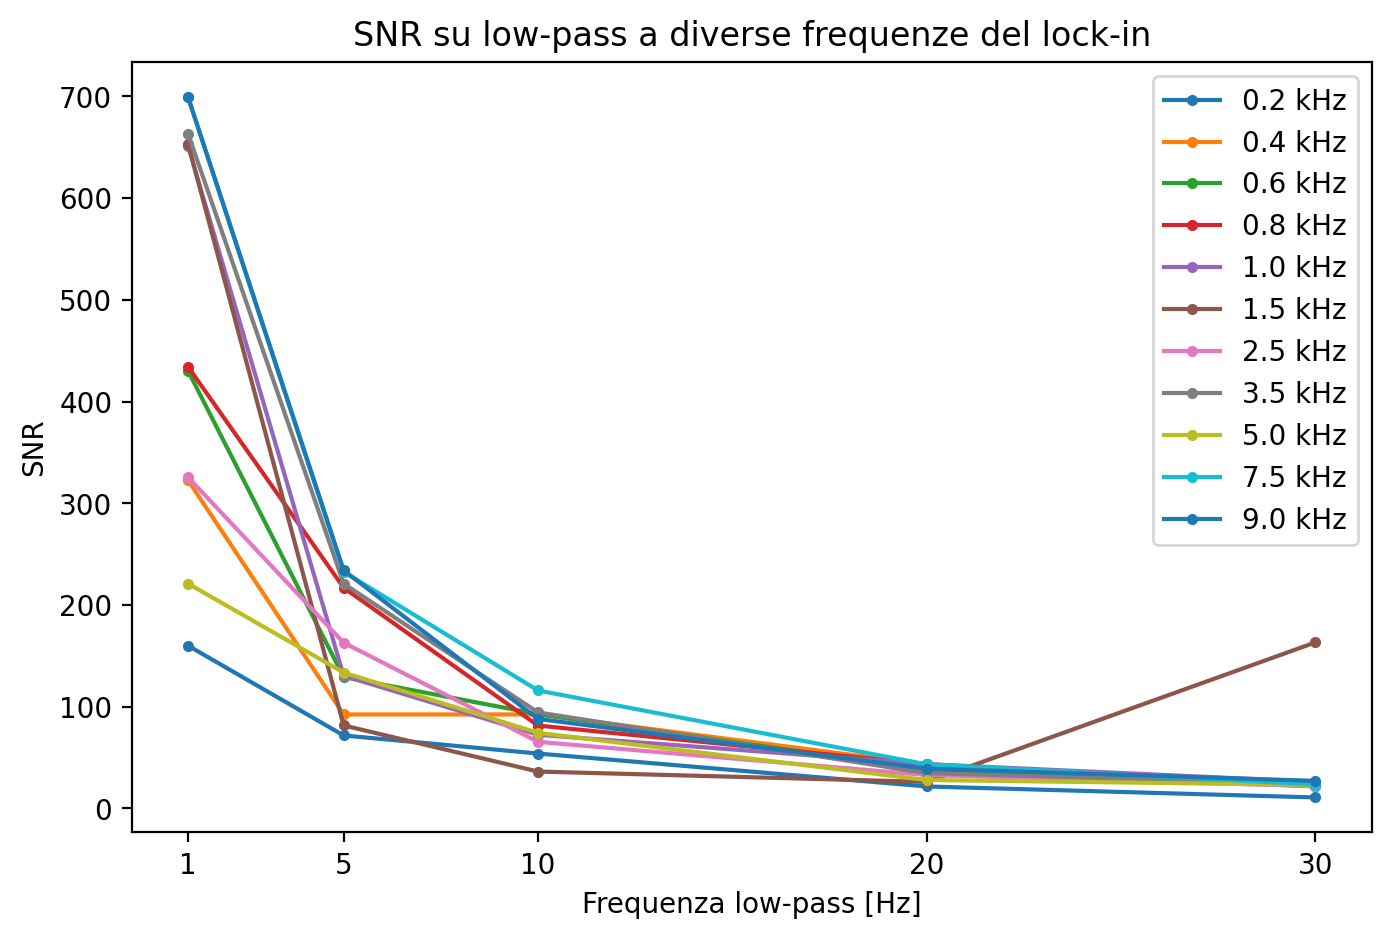

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Legge il file ignorando la prima riga (intestazione)
dati = np.loadtxt("data/snr_lock_in.csv", skiprows=1)
num_colonne = dati.shape[1]

# le successive colonne sono i valori SNR a frequenza chopper fissa
y = [dati[:,i] for i in range(1, num_colonne)] # dalla seconda all'ultima: SNR 
# le frequenze del chopper vengono messe ad etichetta
low_pass = [1, 5, 10, 20, 30]
x = low_pass # Prima colonna: frequenza low-pass filter
intestazione = np.loadtxt("data/snr_lock_in.csv", max_rows=1) 
lock_in = [200, 400, 600, 800, 1000, 1500, 2500, 3500, 5000, 7500, 9000]
lock_in = np.array(lock_in) / 1000

N_lock_in  = len(lock_in)
N_low_pass = len(low_pass)

# Plot
plt.figure(figsize=(8, 5), dpi=200)
for i in range(N_lock_in):
    plt.plot(x, y[i], marker='o', label=f"{lock_in[i]} kHz", linestyle='-', markersize=3)
plt.xlabel("Frequenza low-pass [Hz]")
plt.xticks(x, low_pass)
plt.ylabel("SNR")
plt.title("SNR su low-pass a diverse frequenze del lock-in")
#plt.grid(linestyle='--')
plt.legend()
plt.show()

In [2]:
y

[array([160.        ,  71.77777778,  54.        ,  21.63333333,
         10.83333333]),
 array([322.5       ,  92.42857143,  92.42857143,  43.26666667,
         21.63333333]),
 array([430.        , 129.2       ,  92.71428571,  38.29411765,
         21.7       ]),
 array([434.        , 217.        ,  81.5       ,  43.53333333,
         21.76666667]),
 array([651.        , 130.4       ,  72.44444444,  43.6       ,
         26.16      ]),
 array([653.        ,  81.625     ,  36.27777778,  26.12      ,
        163.25      ]),
 array([325.5 , 163.  ,  65.5 ,  32.85,  21.9 ]),
 array([663.        , 221.        ,  94.42857143,  34.73684211,
         24.2962963 ]),
 array([221.        , 133.6       ,  74.33333333,  27.95833333,
         23.17241379]),
 array([699.        , 232.6666667 , 116.        ,  43.375     ,
         23.51724138]),
 array([699.        , 234.        ,  88.        ,  39.11111111,
         27.11538462])]

A 10 Hz di low pass stiamo tagliando la maggior parte del rumore, senza tagliare troppo segnale. 

- sotto tagli troppo segnale
- sopra tagli poco rumore

# SNR su frequenze del lock-in a diverse freq. low-pass 

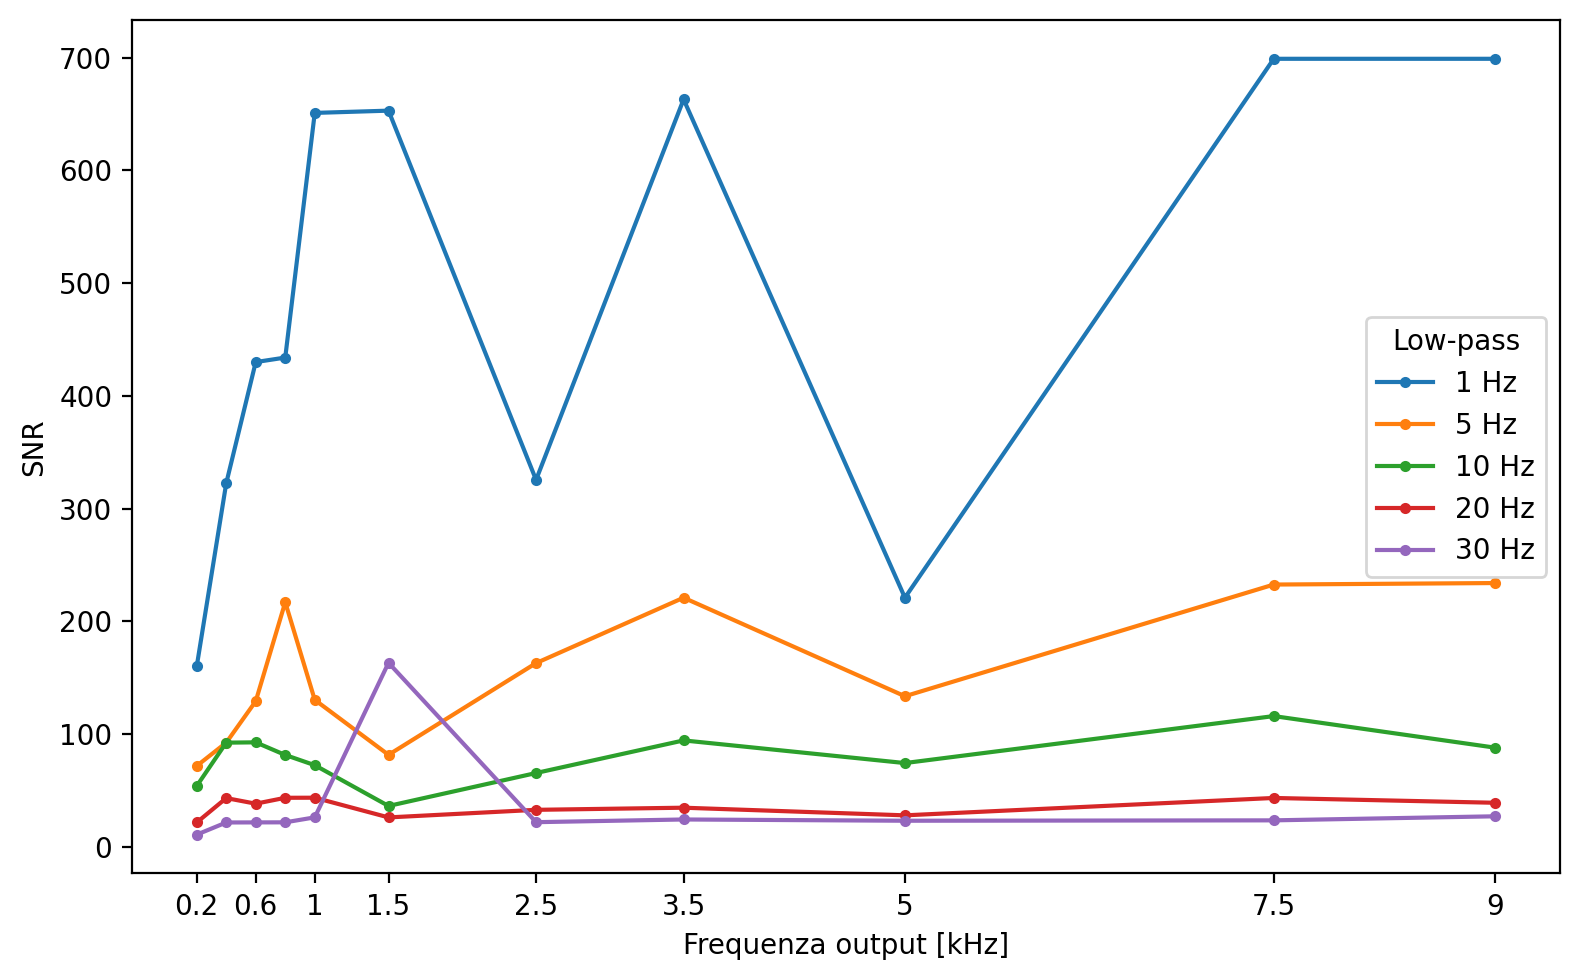

In [3]:
x2 = np.array(lock_in)
y2 = []
for j in range(N_low_pass):
    help = []
    for i in range(N_lock_in):
        help.append(y[i][j])
    y2.append(help)


x2_ticks = [0.2, 0.6, 1, 1.5, 2.5, 3.5, 5, 7.5, 9]


# Plot
plt.figure(figsize=(8, 5), dpi=200)
for i in range(N_low_pass):
    plt.plot(x2, y2[i], marker='o', label=f"{low_pass[i]} Hz", linestyle='-', markersize=3)
plt.xlabel("Frequenza output [kHz]")
#plt.xscale('log')
plt.xticks(x2_ticks, x2_ticks)
plt.ylabel("SNR")
#plt.title("SNR su f out a diverse frequenze del low-pass filter")
#plt.grid(linestyle='--')
plt.tight_layout()
plt.legend(title='Low-pass')
plt.show()

25 marzo
L'obiettivo ora è misurare più frequenze di output, mantenendo il low-pass attorno all'ottimo che abbiamo osservato (10 Hz). In questo modo possiamo estrapolare il **tempo di rilassamento** del sistema.

Tempo di rilassamento: il chopper è come se mettesse il segnale su On/OFF periodicamente. QUando il segnale va OFF il sistema rilassa, quando torna ON viene nuovamente eccitato. Se torna ON troppo in fretta il sistema non fa in tempo a rilassarsi e quindi non c'è niente da eccitare, risultato: il segnale diminuisce.

In [4]:
y2

[[np.float64(160.0),
  np.float64(322.5),
  np.float64(430.0),
  np.float64(434.0),
  np.float64(651.0),
  np.float64(653.0),
  np.float64(325.5),
  np.float64(663.0),
  np.float64(221.0),
  np.float64(699.0),
  np.float64(699.0)],
 [np.float64(71.77777778),
  np.float64(92.42857143),
  np.float64(129.2),
  np.float64(217.0),
  np.float64(130.4),
  np.float64(81.625),
  np.float64(163.0),
  np.float64(221.0),
  np.float64(133.6),
  np.float64(232.6666667),
  np.float64(234.0)],
 [np.float64(54.0),
  np.float64(92.42857143),
  np.float64(92.71428571),
  np.float64(81.5),
  np.float64(72.44444444),
  np.float64(36.27777778),
  np.float64(65.5),
  np.float64(94.42857143),
  np.float64(74.33333333),
  np.float64(116.0),
  np.float64(88.0)],
 [np.float64(21.63333333),
  np.float64(43.26666667),
  np.float64(38.29411765),
  np.float64(43.53333333),
  np.float64(43.6),
  np.float64(26.12),
  np.float64(32.85),
  np.float64(34.73684211),
  np.float64(27.95833333),
  np.float64(43.375),
  np.fl

Blades interne: 20Hz-1kHz
Blades esterne: 